In [1]:
# Citibike 2019 project, analyzing 2018 date of service trip data
# Author: George Chan, Sean Guo

In [2]:
# Import library and modules
import pandas as pd
import glob
import numpy as np
import os
from datetime import timedelta
import matplotlib
import pickle

# Future use
# https://markhneedham.com/blog/2018/09/18/matplotlib-remove-axis-legend/

In [3]:
# Define where are the citibke 2018 zipfiles
data_folder = r'./Data/'
print('The data are stored in: ' + data_folder)

# this is for push test
# this is another push test

The data are stored in: ./Data/


In [4]:
# Check what are the files in that folder
for folderName, subfolders, filenames in os.walk(data_folder):
    print('Here are the list of csv zip files you have downloaded.\n')
    print(folderName)
    
    number_of_csv_file = 0 # Total count of files read
    all_files = []         # List of file path string
    
    # Reference 01: How to get index within for loop?
    # Reference 02: How to pad number with leading zeros?
    for filename in filenames:
        
        # If and only if they are csv files
        if filename.endswith('.csv'):
            number_of_csv_file += 1
            
            # Print to terminal to show user what files is found
            print('\t' + str(number_of_csv_file).zfill(2) + ': ' + filename)
            all_files.append(data_folder + filename)
            
    # all_files = all_files.sort()
            
    # Warning message if you forgot to download all 12 months.
    # For our project we want exactly 12 file
    if number_of_csv_file != 12:
        print('Sorry, I think you are missing some files?')
        
        # Attempt to safely exit the program
        raise SystemExit

Here are the list of csv zip files you have downloaded.

./Data/
	01: 201809-citibike-tripdata.csv
	02: 201801-citibike-tripdata.csv
	03: 201803-citibike-tripdata.csv
	04: 201805-citibike-tripdata.csv
	05: 201807-citibike-tripdata.csv
	06: 201811-citibike-tripdata.csv
	07: 201808-citibike-tripdata.csv
	08: 201802-citibike-tripdata.csv
	09: 201812-citibike-tripdata.csv
	10: 201804-citibike-tripdata.csv
	11: 201810-citibike-tripdata.csv
	12: 201806-citibike-tripdata.csv


In [5]:
# Creating a list of all CSV file in the path directory
# all_files = glob.glob(data_folder + "/*.csv")

# tempCitibike list that store the file data frame
tempCitibike = []

# Track how many records total
totalRecordCount = 0

pickle_storage = 'citibike2018.pkl'

# If the file was properly loaded last time, re-use that dataframe
if (os.path.exists(pickle_storage)):
    citibike = pd.read_pickle(pickle_storage)

# Otherwise Load it from scratch
else:
    # Loop and append the dataframes into tempCitibke List
    for filename in sorted(all_files):
        # Filename is the path/file.ext
        print(os.path.basename(filename), end=" ")

        # df contains the entire dataset (CSV)
        df = pd.read_csv(filename) 

        # How to filter by values
        # https://stackoverflow.com/q/17071871

        # Experiment to see if only using annual membership will show a different
        # df = df.loc[df['usertype'] == 'Subscriber']

        # Because my laptop is too slow .... :P
        # Radnomly select 10% of the data, with random_state = 1
        df = df.sample(frac = 0.1, replace = True, random_state = 1)

        # Output the (rowCount, columnCount) to terminal
        print("size: " + str(df.shape))

        totalRecordCount += df.shape[0]
        tempCitibike.append(df)

    # Combine the tempCitibike dfs together
    citibike = pd.concat(tempCitibike)
    print("\nThere are " + "{:,}".format(totalRecordCount) + " number of records.")
    print("Before dropping NaN: " + "{:,}".format(citibike.shape[0]))

    # Drop rows with any (missing) variables
    # Improve performance by not using inplace option
    # Reference: https://stackoverflow.com/q/22532302
    citibike = citibike.dropna()

    print("After dropping NaN:  " + "{:,}".format(citibike.shape[0]))
    
    # Store the citibike dataframe into a pickle object for future reference
    # This can save time from re-running the entire 17M records.
    citibike.to_pickle('citibike2018.pkl')

In [6]:
# Example 01. How to sample the data using head(n)?
# You can put the number of row n you want to see as parameter
citibike.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
128037,830,2018-01-28 11:56:43.3930,2018-01-28 12:10:33.6090,326.0,E 11 St & 1 Ave,40.729538,-73.984267,238.0,Bank St & Washington St,40.736197,-74.008592,21256,Subscriber,1958,2
491755,126,2018-01-18 09:31:57.5380,2018-01-18 09:34:04.3190,3113.0,Greenpoint Ave & Manhattan Ave,40.730260,-73.953940,3112.0,Milton St & Franklin St,40.729060,-73.957790,33220,Subscriber,1989,1
470924,653,2018-01-05 18:10:32.9340,2018-01-05 18:21:26.2660,3063.0,Nostrand Ave & Myrtle Ave,40.695270,-73.952381,3075.0,Division Ave & Marcy Ave,40.707087,-73.957968,18633,Subscriber,1979,1
491263,821,2018-01-28 16:33:27.7050,2018-01-28 16:47:08.8110,3112.0,Milton St & Franklin St,40.729060,-73.957790,3078.0,Broadway & Roebling St,40.709248,-73.960631,18473,Subscriber,1985,1
371403,559,2018-01-02 19:23:00.5350,2018-01-02 19:32:20.0530,503.0,E 20 St & Park Ave,40.738274,-73.987520,254.0,W 11 St & 6 Ave,40.735324,-73.998004,30669,Subscriber,1952,2


In [7]:
# Example 02. Group by start station name and frequency count
start_count = citibike.groupby('start station name').size()
start_count.head(3)

start station name
1 Ave & E 110 St    1023
1 Ave & E 16 St     6684
1 Ave & E 18 St     4760
dtype: int64

In [8]:
# Example 02B. Sort it and show the top 10
start_count.sort_values(axis=0, ascending=False)[0:10]

start station name
Pershing Square North    14856
E 17 St & Broadway       10862
Broadway & E 22 St       10834
W 21 St & 6 Ave          10726
Broadway & E 14 St        9487
West St & Chambers St     9447
W 41 St & 8 Ave           8699
Broadway & W 60 St        8468
8 Ave & W 33 St           8449
12 Ave & W 40 St          8347
dtype: int64

In [10]:
# Example 03. Iterate through the grouped by object
# Getting a very small piece
small_citibike = citibike.iloc[0:100, :]

# This group the records by start station and all the trips associated
for name, group in small_citibike.groupby('start station name'):
    print(name)
    print(group)

1 Ave & E 30 St
        tripduration                 starttime                  stoptime  \
432755           631  2018-01-03 23:06:33.2550  2018-01-03 23:17:04.3950   

        start station id start station name  start station latitude  \
432755             536.0    1 Ave & E 30 St               40.741444   

        start station longitude  end station id end station name  \
432755               -73.975361           379.0  W 31 St & 7 Ave   

        end station latitude  end station longitude  bikeid    usertype  \
432755             40.749156               -73.9916   32453  Subscriber   

        birth year  gender  
432755        1962       1  
1 Ave & E 62 St
        tripduration                 starttime                  stoptime  \
510148          1160  2018-01-23 15:32:44.7570  2018-01-23 15:52:05.6070   

        start station id start station name  start station latitude  \
510148            3142.0    1 Ave & E 62 St               40.761227   

        start station longitud

       tripduration                 starttime                  stoptime  \
28114           719  2018-01-08 08:24:59.3600  2018-01-08 08:36:58.5420   

       start station id start station name  start station latitude  \
28114             174.0    E 25 St & 1 Ave               40.738177   

       start station longitude  end station id end station name  \
28114               -73.977387           164.0  E 47 St & 2 Ave   

       end station latitude  end station longitude  bikeid    usertype  \
28114             40.753231             -73.970325   30129  Subscriber   

       birth year  gender  
28114        1982       2  
E 27 St & 1 Ave
        tripduration                 starttime                  stoptime  \
457611           567  2018-01-03 17:12:02.3760  2018-01-03 17:21:30.3000   

        start station id start station name  start station latitude  \
457611            2012.0    E 27 St & 1 Ave               40.739445   

        start station longitude  end station id    end s

169688        1969       0  
Wythe Ave & Metropolitan Ave
        tripduration                 starttime                  stoptime  \
447741           418  2018-01-04 09:46:02.8470  2018-01-04 09:53:01.7580   

        start station id            start station name  \
447741            2002.0  Wythe Ave & Metropolitan Ave   

        start station latitude  start station longitude  end station id  \
447741               40.716887               -73.963198          2002.0   

                    end station name  end station latitude  \
447741  Wythe Ave & Metropolitan Ave             40.716887   

        end station longitude  bikeid    usertype  birth year  gender  
447741             -73.963198   16941  Subscriber        1974       0  


In [11]:
# Example 03B. Let's group by multiple keys (start and end station)
for (start, end), group in small_citibike.groupby(['start station name', 'end station name']):
    print((start, end))
    print(group)

('1 Ave & E 30 St', 'W 31 St & 7 Ave')
        tripduration                 starttime                  stoptime  \
432755           631  2018-01-03 23:06:33.2550  2018-01-03 23:17:04.3950   

        start station id start station name  start station latitude  \
432755             536.0    1 Ave & E 30 St               40.741444   

        start station longitude  end station id end station name  \
432755               -73.975361           379.0  W 31 St & 7 Ave   

        end station latitude  end station longitude  bikeid    usertype  \
432755             40.749156               -73.9916   32453  Subscriber   

        birth year  gender  
432755        1962       1  
('1 Ave & E 62 St', 'W 33 St & 7 Ave')
        tripduration                 starttime                  stoptime  \
510148          1160  2018-01-23 15:32:44.7570  2018-01-23 15:52:05.6070   

        start station id start station name  start station latitude  \
510148            3142.0    1 Ave & E 62 St             

       tripduration                 starttime                  stoptime  \
28114           719  2018-01-08 08:24:59.3600  2018-01-08 08:36:58.5420   

       start station id start station name  start station latitude  \
28114             174.0    E 25 St & 1 Ave               40.738177   

       start station longitude  end station id end station name  \
28114               -73.977387           164.0  E 47 St & 2 Ave   

       end station latitude  end station longitude  bikeid    usertype  \
28114             40.753231             -73.970325   30129  Subscriber   

       birth year  gender  
28114        1982       2  
('E 27 St & 1 Ave', 'E 12 St & Avenue B')
        tripduration                 starttime                  stoptime  \
457611           567  2018-01-03 17:12:02.3760  2018-01-03 17:21:30.3000   

        start station id start station name  start station latitude  \
457611            2012.0    E 27 St & 1 Ave               40.739445   

        start station longitud

('Morningside Dr & Amsterdam Ave', 'Adam Clayton Powell Blvd & W 126 St')
        tripduration                 starttime                  stoptime  \
689807           519  2018-01-22 17:06:39.3670  2018-01-22 17:15:18.7570   

        start station id              start station name  \
689807            3543.0  Morningside Dr & Amsterdam Ave   

        start station latitude  start station longitude  end station id  \
689807               40.810285               -73.957365          3629.0   

                           end station name  end station latitude  \
689807  Adam Clayton Powell Blvd & W 126 St             40.809495   

        end station longitude  bikeid    usertype  birth year  gender  
689807             -73.947765   19369  Subscriber        1960       1  
('Nostrand Ave & Myrtle Ave', 'Division Ave & Marcy Ave')
        tripduration                 starttime                  stoptime  \
470924           653  2018-01-05 18:10:32.9340  2018-01-05 18:21:26.2660   

       

63052        1963       2  
('Washington Pl & 6 Ave', 'Great Jones St')
        tripduration                 starttime                  stoptime  \
176643           304  2018-01-25 04:51:17.2100  2018-01-25 04:56:21.2230   

        start station id     start station name  start station latitude  \
176643             369.0  Washington Pl & 6 Ave               40.732241   

        start station longitude  end station id end station name  \
176643               -74.000264           229.0   Great Jones St   

        end station latitude  end station longitude  bikeid    usertype  \
176643             40.727434              -73.99379   31392  Subscriber   

        birth year  gender  
176643        1966       1  
('Washington Pl & 6 Ave', 'Lexington Ave & E 24 St')
        tripduration                 starttime                  stoptime  \
176485           609  2018-01-21 23:06:47.5900  2018-01-21 23:16:57.3580   

        start station id     start station name  start station latitude 

In [12]:
# Example 04. Get the mean (average) duration of the trips in seconds
average_trip_length = citibike['tripduration'].mean() / 60
print('Average Trip in minutes:', round(average_trip_length))

Average Trip in minutes: 17


In [17]:
# Example 04B. Get the count of trips by year of birth
year_of_birth_trip_size = citibike.groupby('birth year').size()
year_of_birth_trip_size.head(5)

birth year
1885     31
1886     38
1887     85
1888    107
1889     10
dtype: int64

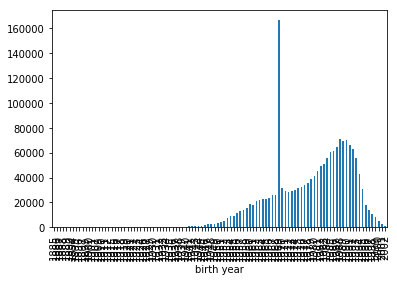

In [18]:
# We see a huge spike for random numbers
year_of_birth_trip_size.plot(kind='bar')

Adjusted birth year and trip line graph, it looks much better!


(1940, 2002)

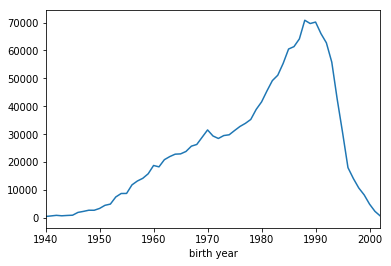

In [19]:
# Let's exclude 55 since we know it's a dummy value
# year_of_birth_trip_size = citibike[citibike['birth year' != 1969]].groupby('birth year').size()
# year_of_birth_trip_size.sort_values()
# year_of_birth_trip_size.head(5)

print('Adjusted birth year and trip line graph, it looks much better!')
not_55_filter = citibike['birth year'] != 1969
year_of_birth_trip_size = citibike[not_55_filter].groupby('birth year').size()
ax = year_of_birth_trip_size.plot()
ax.set_xlim(1940, 2002)